In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats
from tensorflow.keras.regularizers import l1, l2

In [24]:
# Load dataset
file_path = "/content/apple_stock_cleaned.xls"
df = pd.read_csv(file_path)

In [25]:
# Convert Date/Time column to datetime format
if "date" in df.columns:  # Replace "Date" with the actual column name
    df["date"] = pd.to_datetime(df["date"])

In [26]:
# Selecting 'Close' price as target variable
data = df[['4. close']].values

In [27]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [28]:
# Function to create sequences for LSTM
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define time steps (lookback period)
time_steps = 50

# Create sequences
X, y = create_sequences(data_scaled, time_steps)

In [29]:
# Split into training and test sets (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [36]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(LSTM(units=50, return_sequences=False, kernel_regularizer=l1(0.001)))  # L1 regularization

# Build your LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Predicting 'close' price

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 0.0487 - val_loss: 0.0018
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0048 - val_loss: 8.5263e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0048 - val_loss: 4.1974e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0041 - val_loss: 4.1154e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0039 - val_loss: 7.3241e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.0040 - val_loss: 5.2993e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0036 - val_loss: 2.8214e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0039 - val_loss: 9.6673e-04
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch

In [38]:
# Make predictions (optional)
predictions = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


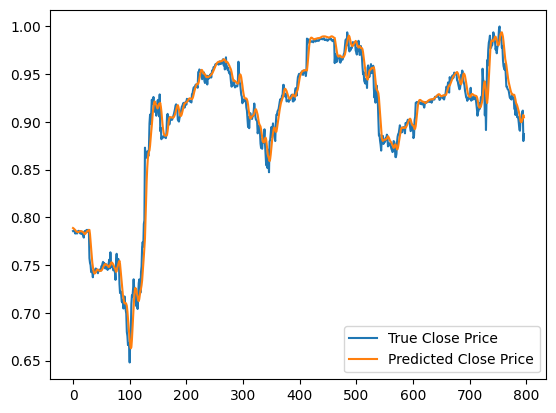

In [39]:
# Visualizing the results (optional)
plt.plot(y_test, label='True Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.legend()
plt.show()

In [40]:
# Calculate MSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.00014052743497243534
Mean Absolute Error (MAE): 0.007775320106799264
R² Score: 0.9754146747922934
